In [42]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
ads_data = pd.read_csv('C:/Users/majkl/WorkSpace/Project_5/ads_data.csv', parse_dates=['date', 'time'])
ads_clients_data = pd.read_csv('C:/Users/majkl/WorkSpace/Project_5/ads_clients_data.csv', parse_dates=['date', 'create_date'])

In [4]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [5]:
print(ads_data.isnull().sum())

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64


In [6]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   date                   1000000 non-null  datetime64[ns]
 1   time                   1000000 non-null  datetime64[ns]
 2   event                  1000000 non-null  object        
 3   platform               1000000 non-null  object        
 4   ad_id                  1000000 non-null  int64         
 5   client_union_id        1000000 non-null  int64         
 6   campaign_union_id      1000000 non-null  int64         
 7   ad_cost_type           1000000 non-null  object        
 8   ad_cost                1000000 non-null  float64       
 9   has_video              1000000 non-null  int64         
 10  target_audience_count  1000000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 83.9+ MB


In [7]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [8]:
print(ads_clients_data.isnull().sum())

date               0
client_union_id    0
community_id       0
create_date        0
dtype: int64


In [9]:
ads_clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122078 entries, 0 to 122077
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             122078 non-null  datetime64[ns]
 1   client_union_id  122078 non-null  int64         
 2   community_id     122078 non-null  int64         
 3   create_date      122078 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 3.7 MB


Разобраться с распределением количества показов и кликов. Посчитать среднее количество показов и среднее количество кликов на объявления за весь период (округлить до целых).

In [10]:
event = ads_data.groupby(['ad_id', 'event'], as_index=False).size()
event.head()


,ad_id,event,size
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [11]:
event_pivot = event.pivot(index='ad_id', columns='event', values='size')
event_pivot.fillna(0)


event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [12]:
n, b = event_pivot.mean().round()

In [13]:
print(f'Среднее количество кликов {n}, среднее количество показов {b}')

Среднее количество кликов 208.0, среднее количество показов 932.0


Нарисовать график распределения показов на объявление за весь период.

In [14]:
view = ads_data.loc[ads_data.event == 'view'].ad_id.value_counts().head()
view

ad_id
112583    351802
107729    184596
107837     51996
28142      24152
45008      19668
Name: count, dtype: int64

In [15]:
sns.set(
font_scale=2,
style="whitegrid",
rc={'figure.figsize':(20,7)}
       )

In [16]:
log_views = np.log(ads_data.loc[ads_data.event == 'view'].ad_id.value_counts())
log_views.head()

ad_id
112583    12.770824
107729    12.125925
107837    10.858922
28142     10.092122
45008      9.886748
Name: count, dtype: float64

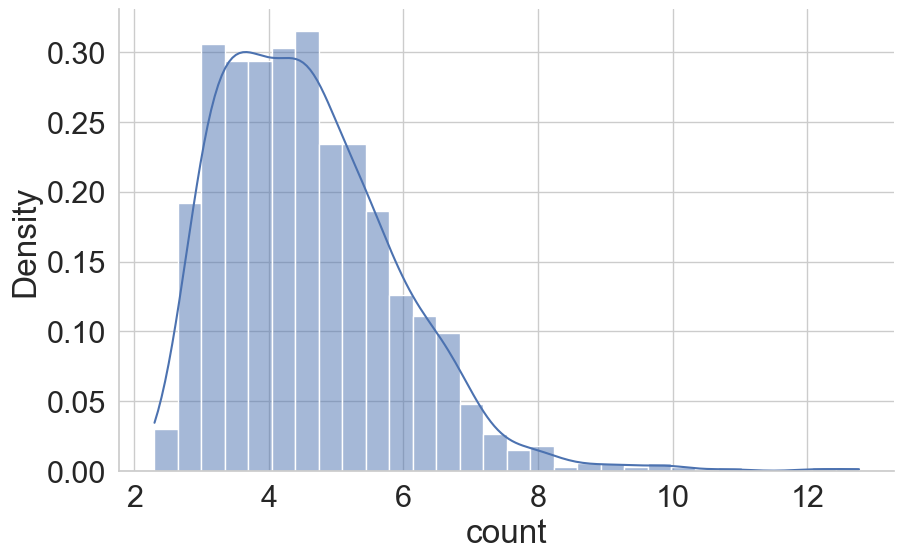

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=log_views, kde=True, stat='density', ax=ax)
sns.despine()

Посчитать скользящее среднее показов с окном 2. Какое значение скользящего среднего получится за 6 апреля 2019 года (ответ округлить до целых)?

In [18]:
daily_ad_views = ads_data.loc[ads_data.event == 'view'].pivot_table(index='ad_id',
                                                                    columns='date',
                                                                    values='time', 
                                                                    aggfunc='count')
daily_ad_views.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [19]:
mean_views = daily_ad_views.mean()
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [20]:
rolling_daily = daily_ad_views.mean().rolling(window=2).mean().round(0)
rolling_daily

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [21]:
a = rolling_daily['2019-04-06']
print(f'Значение скользящего среднего за 6 апреля 2019 года {a}')

Значение скользящего среднего за 6 апреля 2019 года 598.0


Нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 

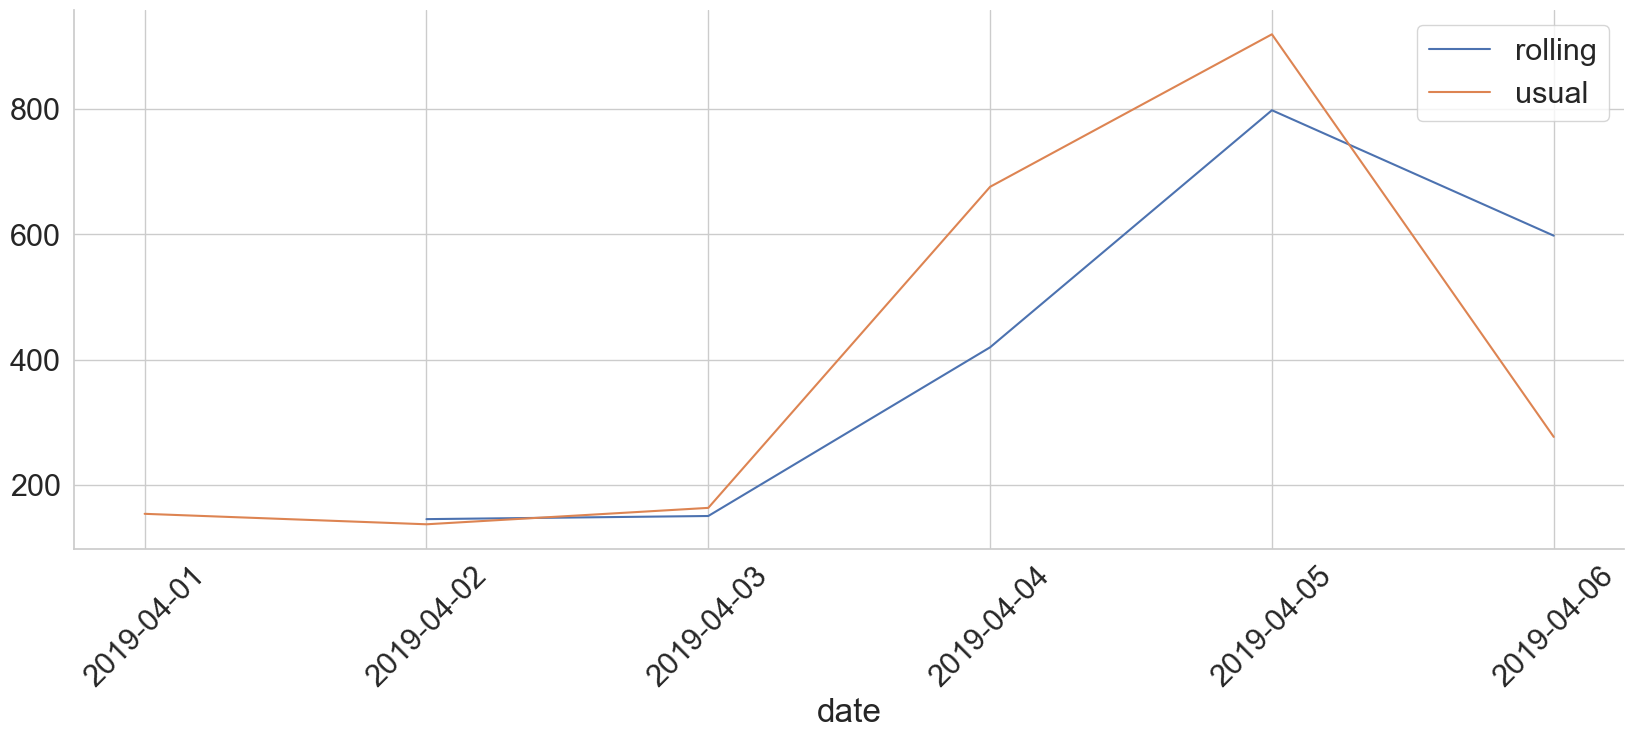

In [22]:
fig, ax = plt.subplots()
sns.lineplot(data=rolling_daily, ax=ax, label='rolling')
sns.lineplot(data=mean_views, ax=ax, label='usual')
ax.tick_params(axis='x', rotation=45)
plt.legend()
sns.despine()

Большая разница наблюдается 04.04.2019

Подгрузить данные по рекламным клиентам и найти среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [23]:
merged = ads_clients_data.merge(ads_data, on=['client_union_id'], suffixes=('_clients_data', '_ad_data'))
merged.head()

,date_clients_data,client_union_id,community_id,create_date,date_ad_data,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035


In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   date_clients_data      1000000 non-null  datetime64[ns]
 1   client_union_id        1000000 non-null  int64         
 2   community_id           1000000 non-null  int64         
 3   create_date            1000000 non-null  datetime64[ns]
 4   date_ad_data           1000000 non-null  datetime64[ns]
 5   time                   1000000 non-null  datetime64[ns]
 6   event                  1000000 non-null  object        
 7   platform               1000000 non-null  object        
 8   ad_id                  1000000 non-null  int64         
 9   campaign_union_id      1000000 non-null  int64         
 10  ad_cost_type           1000000 non-null  object        
 11  ad_cost                1000000 non-null  float64       
 12  has_video              100000

In [26]:
merged['difference'] = merged.date_ad_data - merged.create_date
merged

,date_clients_data,client_union_id,community_id,create_date,date_ad_data,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,difference
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035,98 days
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035,98 days
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035,98 days
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035,98 days
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035,98 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 21:54:35,view,android,122078,122078,CPC,56.4,0,32354,72 days
999996,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:26:58,view,web,122078,122078,CPC,56.4,0,32354,72 days
999997,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:32:34,view,android,122078,122078,CPC,56.4,0,32354,72 days
999998,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:43:03,view,ios,122078,122078,CPC,56.4,0,32354,72 days


In [27]:
first_ad = merged.groupby('client_union_id').difference.min()
first_ad

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: difference, Length: 838, dtype: timedelta64[ns]

In [32]:

print(f'Cреднее количество дней от даты создания рекламного клиента \nи первым запуском рекламного объявления этим клиентом: {first_ad.mean().days}')

Cреднее количество дней от даты создания рекламного клиента 
и первым запуском рекламного объявления этим клиентом: 124


Вычислить конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней.

In [33]:
treshold = pd.Timedelta(365, unit='day')
lt_365 = first_ad.loc[first_ad < treshold]
lt_365

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: difference, Length: 838, dtype: timedelta64[ns]

In [35]:
q = np.round(len(lt_365) / ads_clients_data.client_union_id.nunique() * 100, 2)

In [36]:
print(f'Конверсия из создания рекламного клиента в запуск первой рекламы равна {q}')

Конверсия из создания рекламного клиента в запуск первой рекламы равна 0.69


Разбить наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определить, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [37]:
bins = [0, 30, 90, 180, 365]
bins = [pd.Timedelta(x, 'd') for x in bins]
bins

[Timedelta('0 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('90 days 00:00:00'),
 Timedelta('180 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

In [38]:
labels = ['0 - 30', '30 - 90', '90 - 180', '180 - 365']

In [39]:
binned_first = pd.cut(first_ad, bins, labels=labels)
binned_first.head()

client_union_id
1     90 - 180
9     90 - 180
13     30 - 90
16    90 - 180
20     30 - 90
Name: difference, dtype: category
Categories (4, object): ['0 - 30' < '30 - 90' < '90 - 180' < '180 - 365']

In [40]:
binned_first.value_counts()

difference
90 - 180     396
30 - 90      263
180 - 365    168
0 - 30        11
Name: count, dtype: int64

Ответ: `0-30 => 11`

Вывести на интерактивный график  категории полученные ранее с количеством уникальных клиентов в них

In [43]:
px.bar(binned_first.value_counts())